<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [34]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : false

Test Summary:         | Pass  Total  Time
Lagrangien augmenté   |   12     12  5.3s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

In [ ]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

### Q1 ###

In [35]:
function afficher_resultats_lagrange(nom_fct, x0, x_sol, f_sol, flag, nbiters, λ0, μ0, solution)
    println("-------------------------------------------------------------------------")
    printstyled("Résultats de lagrangien augmenté appliqué à ", nom_fct, ":\n", bold=true, color=:blue)
    println("  * x0       = ", x0)
    println("  * x_sol    = ", x_sol)
    println("  * f(x_sol) = ", f_sol)
    println("  * nb_iters = ", nbiters)
    println("  * flag     = ", flag)
    println("  * λ0     = ", λ0)
    println("  * μ0     = ", μ0)
    println("  * solution = ", solution)
end

fct1(x) =  2*(x[1]+x[2]+x[3]-3)^2 + (x[1]-x[2])^2 + (x[2]-x[3])^2
# la gradient de la fonction fct1
function grad_fct1(x)
    y1 = 4*(x[1]+x[2]+x[3]-3) + 2*(x[1]-x[2])
    y2 = 4*(x[1]+x[2]+x[3]-3) - 2*(x[1]-x[2]) +2*(x[2]-x[3])
    y3 = 4*(x[1]+x[2]+x[3]-3) - 2*(x[2]-x[3])
    return [y1;y2;y3]
end
# la hessienne de la fonction fct1
hess_fct1(x) = [6 2 4;2 8 2;4 2 6]

c(x) =  x[1]+x[3]-1
gradc(x) = [1 ;0; 1]
hessc(x) = [0 0 0;0 0 0;0 0 0]

hessc (generic function with 1 method)

In [36]:
x0 = [1, 1, 1]
solution = [0.5, 1.25, 0.5]

# étude de λ0

x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(fct1, grad_fct1, hess_fct1, c, gradc, hessc, x0 , λ0=1)
afficher_resultats_lagrange("f1", x0, x_sol, f_sol, flag, nb_iters, λs[1], μs[1], solution)

x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(fct1, grad_fct1, hess_fct1, c, gradc, hessc, x0 , λ0=100)
afficher_resultats_lagrange("f1", x0, x_sol, f_sol, flag, nb_iters, λs[1], μs[1], solution)

x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(fct1, grad_fct1, hess_fct1, c, gradc, hessc, x0 , λ0=10000)
afficher_resultats_lagrange("f1", x0, x_sol, f_sol, flag, nb_iters, λs[1], μs[1], solution)

-------------------------------------------------------------------------
Résultats de lagrangien augmenté appliqué à f1:
  * x0       = [1, 1, 1]
  * x_sol    = [0.5000000026077032, 1.2499999973922968, 0.5000000026077032]
  * f(x_sol) = 2.249999976530671
  * nb_iters = 27
  * flag     = 0
  * λ0     = 1
  * μ0     = 10
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de lagrangien augmenté appliqué à f1:
  * x0       = [1, 1, 1]
  * x_sol    = [0.49999999555293473, 1.2500000711530437, 0.49999999555293473]
  * f(x_sol) = 2.2500000400236067
  * nb_iters = 31
  * flag     = 0
  * λ0     = 100
  * μ0     = 10
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de lagrangien augmenté appliqué à f1:
  * x0       = [1, 1, 1]
  * x_sol    = [0.4999999963636583, 1.250007447227773, 0.4999999963636583]
  * f(x_sol) = 2.2500000329488126
  * nb_iters = 38
  * flag     

##### On constate que lorsqu'on augmente λ0 , le nombre d'itérations augmente ce qui ralentit la convergence. #####


In [38]:
x0 = [1, 1, 1]
solution = [0.5, 1.25, 0.5]

# étude de μ0

x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(fct1, grad_fct1, hess_fct1, c, gradc, hessc, x0 , μ0=1)
afficher_resultats_lagrange("f1", x0, x_sol, f_sol, flag, nb_iters, λs[1], μs[1], solution)

x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(fct1, grad_fct1, hess_fct1, c, gradc, hessc, x0 , μ0=10)
afficher_resultats_lagrange("f1", x0, x_sol, f_sol, flag, nb_iters, λs[1], μs[1], solution)

x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(fct1, grad_fct1, hess_fct1, c, gradc, hessc, x0 , μ0=100)
afficher_resultats_lagrange("f1", x0, x_sol, f_sol, flag, nb_iters, λs[1], μs[1], solution)

-------------------------------------------------------------------------
Résultats de lagrangien augmenté appliqué à f1:
  * x0       = [1, 1, 1]
  * x_sol    = [0.5000000046566128, 1.2499999953433873, 0.5000000046566128]
  * f(x_sol) = 2.249999958090485
  * nb_iters = 29
  * flag     = 0
  * λ0     = 2
  * μ0     = 1
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de lagrangien augmenté appliqué à f1:
  * x0       = [1, 1, 1]
  * x_sol    = [0.5000000037252903, 1.2499999981373549, 0.5000000037252903]
  * f(x_sol) = 2.2499999664723873
  * nb_iters = 26
  * flag     = 0
  * λ0     = 2
  * μ0     = 10
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de lagrangien augmenté appliqué à f1:
  * x0       = [1, 1, 1]
  * x_sol    = [0.51196172248804, 1.244019138755981, 0.51196172248804]
  * f(x_sol) = 2.1436322428515693
  * nb_iters = 1
  * flag     = 0
  * λ0

##### On constate que lorsqu'on augmente μ0 , le nombre d'itérations diminue ce qui accelere la convergence. #####

### Q2 ###

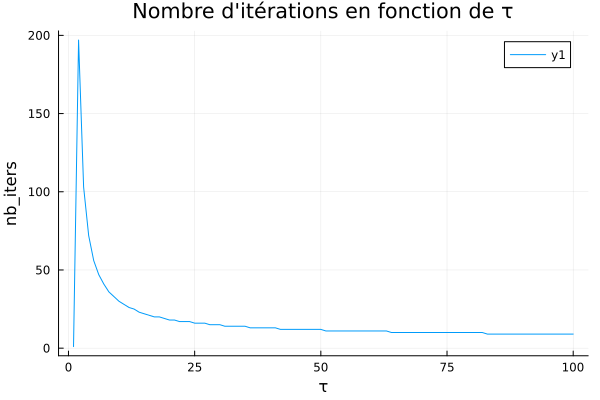

In [39]:
using Plots
iterations = []
for τ in range(1,10,100)
   x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(fct1, grad_fct1, hess_fct1, c, gradc, hessc, x0, τ=τ)
   iterations =vcat(iterations,nb_iters)   
end
plot(range(1,100,100),iterations,xlabel=("τ"),ylabel=("nb_iters"),title="Nombre d'itérations en fonction de τ")


##### On remarque qu'à partir de la valeur τ~~3 , le nombre d'itérations est une fonction décroissante en fonction du τ, donc augmenter la valeur de τ permet de converger rapidement vers la solution. #####